In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [3]:

'''reading the two file 1) training data 2) test data'''
trainingData = np.genfromtxt('regression/trainingData.csv', delimiter=',')
testData = np.genfromtxt('regression/testData.csv', delimiter=',')

In [4]:
trainingData

array([[-3.55260160e-01, -9.16478187e-01,  2.12727325e-01, ...,
        -2.13211436e+00,  6.02891321e-01,  2.02757098e+02],
       [-2.59770428e-01,  8.18199267e-01, -5.04843377e-02, ...,
        -1.24642147e+00, -8.20249695e-01,  1.66392953e+01],
       [ 2.88811289e-01,  8.54859866e-02,  1.57584309e+00, ...,
         1.49946574e-02,  6.02268416e-01,  3.65348893e+02],
       ...,
       [ 7.28598018e-02,  2.91195192e-02, -1.17748076e+00, ...,
         1.12729772e+00, -9.83211746e-01, -8.67781482e+01],
       [ 6.64815867e-01,  1.36890671e+00, -6.08645775e-02, ...,
         8.62395684e-01, -3.45281271e-01, -1.05984126e+01],
       [-7.56297618e-01,  1.90023361e+00, -4.84099248e-01, ...,
        -1.66836390e+00,  1.23069806e-01,  1.71218179e+02]])

In [5]:
testData

array([[ 5.75497399e-01,  5.95096984e-01, -4.72078726e-01, ...,
         7.46907439e-01, -9.37143858e-02, -1.74083500e+02],
       [-9.26255698e-01, -3.57772788e+00, -1.17325653e-02, ...,
        -8.93717226e-01,  6.92273219e-01,  1.78155791e+01],
       [-1.13569064e+00, -8.13875698e-02, -8.01636967e-01, ...,
        -8.33832644e-01,  6.12285272e-02, -2.00879948e+01],
       ...,
       [ 1.85227716e+00, -5.95228308e-01,  2.10711758e+00, ...,
         1.36179059e-02, -6.32340832e-02,  1.12458522e+02],
       [ 9.86620419e-01,  1.38212784e+00, -9.42899599e-01, ...,
        -7.70339207e-01, -8.58950935e-02, -1.85802807e+02],
       [-1.08033245e+00, -6.54296249e-01,  4.86058643e-01, ...,
        -8.95496989e-01,  2.39946379e-01,  2.40308090e+02]])

In [6]:
grid_params = [
    {'n_neighbors': 3, 'metric': ['euclidean', 'minkowski']},
    {'n_neighbors': 3, 'metric': ['mahalanobis', 'seuclidean'],
     'metric_params': [{'VI': np.cov(trainingData[:, 0:-1])}]}
]

#  Using different measure of distance
1) Manhattan
2) Minkowski
3) Mahalanobis
4) Hamming

1) Manhattan

In [7]:
# KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='manhattan')

KNNRegression.fit(trainingData[:, 0:-1], trainingData[:,-1])

KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=3)

In [8]:
KNNRegression.score(testData[:,0:-1], testData[:,-1])

0.785410373405073

2) Minkoswki

In [9]:
# KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='minkowski')

KNNRegression.fit(trainingData[:, 0:-1], trainingData[:,-1])

KNeighborsRegressor(algorithm='brute', n_neighbors=3)

In [10]:
KNNRegression.score(testData[:,0:-1], testData[:,-1])

0.8165934427865968

3) Mahalanobis

In [11]:
KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='mahalanobis', metric_params={'VI':np.cov(trainingData[:, 0:-1])})

KNNRegression.fit(trainingData[:, 0:-1], trainingData[:,-1])

KNeighborsRegressor(algorithm='brute', metric='mahalanobis',
                    metric_params={'VI': array([[ 1.10627836,  0.12535803, -0.02765481, ..., -0.41880522,
        -0.59713489,  0.20156931],
       [ 0.12535803,  1.00190315, -0.1984574 , ...,  0.30053543,
        -0.15101237,  0.22505434],
       [-0.02765481, -0.1984574 ,  0.95482353, ..., -0.22128758,
        -0.01273118,  0.23208212],
       ...,
       [-0.41880522,  0.30053543, -0.22128758, ...,  0.82752817,
         0.36539651, -0.37336213],
       [-0.59713489, -0.15101237, -0.01273118, ...,  0.36539651,
         0.81258381,  0.0698001 ],
       [ 0.20156931,  0.22505434,  0.23208212, ..., -0.37336213,
         0.0698001 ,  1.01664977]])},
                    n_neighbors=3)

In [12]:
KNNRegression.score(testData[:,0:-1], testData[:,-1])

-0.0952815183937048

4) Hamming

In [13]:
KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='hamming', metric_params={'V':np.cov(trainingData[:, 0:-1])})

KNNRegression.fit(trainingData[:, 0:-1], trainingData[:,-1])

KNeighborsRegressor(algorithm='brute', metric='hamming',
                    metric_params={'V': array([[ 1.10627836,  0.12535803, -0.02765481, ..., -0.41880522,
        -0.59713489,  0.20156931],
       [ 0.12535803,  1.00190315, -0.1984574 , ...,  0.30053543,
        -0.15101237,  0.22505434],
       [-0.02765481, -0.1984574 ,  0.95482353, ..., -0.22128758,
        -0.01273118,  0.23208212],
       ...,
       [-0.41880522,  0.30053543, -0.22128758, ...,  0.82752817,
         0.36539651, -0.37336213],
       [-0.59713489, -0.15101237, -0.01273118, ...,  0.36539651,
         0.81258381,  0.0698001 ],
       [ 0.20156931,  0.22505434,  0.23208212, ..., -0.37336213,
         0.0698001 ,  1.01664977]])},
                    n_neighbors=3)

In [14]:
KNNRegression.score(testData[:,0:-1], testData[:,-1])

-1.34814019784057

********************************************************************************************************************
********************************************************************************************************************
********************************************************************************************************************

# Now will be using Normalisation technique (Min-Max Scaler)
# will use weights as 'inverse of squared distance'

In [15]:
def calculate_distances(traininginstance, queryinstance):
    '''
    :param traininginstance:
    :param queryinstance:
    :return: euclidean distance
    --------------------------------------------------------------
    this function from inside predict function
    it will calculate euclidean distance of each query intance with all other training instance
    '''
    return np.sqrt(np.sum(np.square(queryinstance - traininginstance), axis=1))

In [16]:
# Average 3 Nearest distance
def KNN_3_distance(trainingData, index_value, k):
    return np.mean(trainingData[index_value[0:k], -1])

In [17]:
# Inverse weighted distance average
def inverse_weighted(trainingData, c_distance, index_value, k):
    return np.sum(trainingData[index_value[0:k],-1] * (1/(c_distance[index_value[0:k]]))) / np.sum(np.square(1/(c_distance[index_value[0:k]])))

In [18]:
# square inverse wieghted distance
def square_inverse(trainingData, c_distance, index_value, k):
    return np.sum(trainingData[index_value[0:k], -1] * (1 / (c_distance[index_value[0:k]]))) / np.sum((1 / (c_distance[index_value[0:k]])))

In [19]:
def predict(traininginstance, queryinstance,trainingData, k):
    '''
    :param traininginstance: all the 12 features of all row
    :param queryinstance: Features from testData.csv
    :param trainingData: this values is taken to find the prediction value
    :param k: kNN Performance for K= 3
    :return: the predicted value before calculating the r2 score

    Here this function perform some task
    a) call calculate distance function where it gets distance of between each query instance with all training instance
    b) it will select 3 nearest neighbours (mention k=3)
    c) calculate average distance between the target value and the 3 neares neighbours
    '''
    
    c_distance = calculate_distances(traininginstance, queryinstance)
    index_value = np.argsort(c_distance)
    
#     # Average 3 Nearest distance
#     predicted_value = KNN_3_distance(trainingData, index_value, k)

#     # Inverse weighted distance average
#     predicted_value = inverse_weighted(trainingData, c_distance, index_value, k)
    
    # square inverse wieghted distance
    predicted_value = square_inverse(trainingData, c_distance, index_value, k)
    
    return predicted_value

In [20]:
def calculate_r2(targetData, predictedData):
    '''
    this function will take
    :param targetData: this values are taken from testData.csv
    :param predictedData: this values are returned from predict function
    :return: it will return the R2 Score
    '''
    sum_square = np.sum(np.square(predictedData - targetData))
    sum_square_mean = np.sum(np.square(np.mean(targetData) - targetData))
    div =(sum_square / sum_square_mean)
    return 1 - div

In [21]:
def execution_main_1():
    
    min_trainingData = trainingData[:,0:-1].min(axis = 0)
    max_trainingData = trainingData[:,0:-1].max(axis = 0)

    trainingData[:,0:-1] = ( trainingData[:,0:-1] - trainingData[:,0:-1].min(axis = 0) ) / ( trainingData[:,0:-1].max(axis = 0) - trainingData[:,0:-1].min(axis = 0) )

    testData[:,0:-1] = ( testData[:, 0:-1] - min_trainingData ) / ( max_trainingData - min_trainingData )
    
    
    k = 3
    prediction = []
    len_test_data = len(testData)
    
    
    min_training_data = trainingData[:,0:-1].min(axis=0)
    max_training_data = trainingData[:,0:-1].max(axis=0)
    
    trainingData[:,0:-1] = (trainingData[:,0:-1] )

    '''this loop will run for length of test data instances'''
    for p in range(len_test_data):
        prediction_value = predict(trainingData[:, 0:-1], testData[p, 0:-1], trainingData, k )
        prediction.append(prediction_value)

    '''this function will use actual target value with predicted value'''
    r2_score = calculate_r2(testData[:, -1], np.array(prediction) )
    print("R2 = ", r2_score)


In [22]:
execution_main_1()

R2 =  0.8277956283089746


Altering he scale has not much impact on the score of R-Squared Error

https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d
#### The Art of Finding the Best Features for Machine Learning

In most of the cases there will features that will be impacting on the performance of the model, it is one of the practice to discard them, but which feature has to be discarded is tricky thing, there are different methods for this, in this Correlation plot will be used.

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Converting the data which is in numpy array into dataframe

In [114]:
df_trainingData = pd.DataFrame(trainingData)
df_testData = pd.DataFrame(testData)


In [115]:
print("Training Data")
print(df_trainingData)
print("------------------------------------")

print("Test Data")
print(df_testData)

Training Data
            0         1         2         3         4         5         6   \
0    -0.355260 -0.916478  0.212727  1.691821  1.722946  0.014057  0.570765   
1    -0.259770  0.818199 -0.050484  1.413709 -1.672305  1.299030  0.637234   
2     0.288811  0.085486  1.575843 -1.453758  0.623998 -0.590785  0.995861   
3    -0.475249  0.416048  0.571395  0.786322  0.272092 -2.538714 -0.795147   
4     0.698850 -0.056299  0.183561 -0.481980 -0.140892 -0.034222  1.201377   
...        ...       ...       ...       ...       ...       ...       ...   
6395 -0.592672 -0.079584  0.580508 -1.249250  1.392495  0.671837 -0.127098   
6396  1.083666 -0.125082 -0.549964  0.618267 -1.415781  1.372890 -0.774299   
6397  0.072860  0.029120 -1.177481  0.388321 -1.216634  0.830030 -1.337754   
6398  0.664816  1.368907 -0.060865 -0.831014 -0.991645 -0.492939 -1.325808   
6399 -0.756298  1.900234 -0.484099 -0.316558 -0.232818 -1.334116  1.262239   

            7         8         9         10     

In [116]:
df_trainingData['target'] = trainingData[:,-1]
df_trainingData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,-0.355260,-0.916478,0.212727,1.691821,1.722946,0.014057,0.570765,0.421842,0.549200,0.590142,-2.132114,0.602891,202.757098,202.757098
1,-0.259770,0.818199,-0.050484,1.413709,-1.672305,1.299030,0.637234,0.734399,0.427862,-0.687950,-1.246421,-0.820250,16.639295,16.639295
2,0.288811,0.085486,1.575843,-1.453758,0.623998,-0.590785,0.995861,2.369436,0.445668,0.054014,0.014995,0.602268,365.348893,365.348893
3,-0.475249,0.416048,0.571395,0.786322,0.272092,-2.538714,-0.795147,-0.112647,-2.047869,-1.297694,-0.703572,-0.641172,-286.323335,-286.323335
4,0.698850,-0.056299,0.183561,-0.481980,-0.140892,-0.034222,1.201377,-1.516041,-1.783223,0.986256,-2.279495,-1.509252,-110.632098,-110.632098


<ipython-input-117-3d4c3dca8a5a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_trainingData_corr, dtype=np.bool))


<AxesSubplot:>

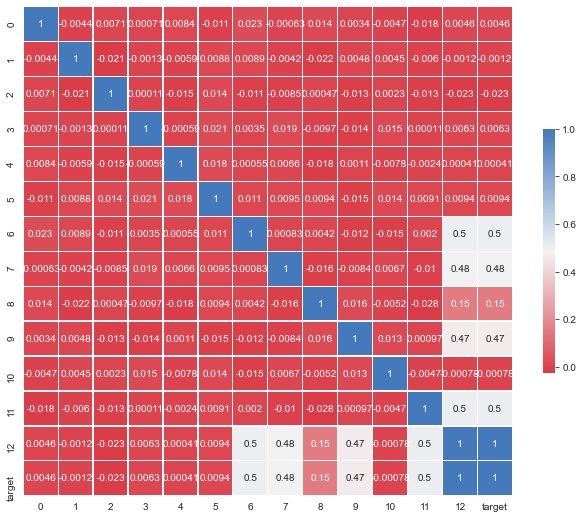

In [117]:
df_trainingData_corr = df_trainingData.corr()

# visualise
mask = np.triu(np.ones_like(df_trainingData_corr, dtype=np.bool))
sns.set_style(style = 'white')

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(10, 250, as_cmap=True)

sns.heatmap(df_trainingData_corr,  cmap=cmap, annot=True,
        square=True, linewidths=0.25, cbar_kws={"shrink": .5}, ax=ax)

In [53]:
df_trainingData_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.004362,0.007072,0.000705,0.008373,-0.011065,0.022645,-0.000628,0.014265,0.003355,-0.004684,-0.017824,0.004609,0.004609
1,-0.004362,1.000000,-0.020603,-0.001333,-0.005931,0.008843,0.008947,-0.004167,-0.021844,0.004767,0.004464,-0.005987,-0.001219,-0.001219
2,0.007072,-0.020603,1.000000,0.000111,-0.014672,0.014021,-0.010896,-0.008521,0.000466,-0.013469,0.002297,-0.013291,-0.022593,-0.022593
3,0.000705,-0.001333,0.000111,1.000000,-0.000592,0.020930,0.003464,0.018884,-0.009665,-0.013561,0.014955,0.000111,0.006303,0.006303
4,0.008373,-0.005931,-0.014672,-0.000592,1.000000,0.018053,0.000553,0.006604,-0.018079,0.001130,-0.007775,-0.002404,0.000415,0.000415
5,-0.011065,0.008843,0.014021,0.020930,0.018053,1.000000,0.010928,0.009479,0.009403,-0.014863,0.013834,0.009100,0.009425,0.009425
6,0.022645,0.008947,-0.010896,0.003464,0.000553,0.010928,1.000000,0.000829,0.004241,-0.012111,-0.014598,0.001990,0.500095,0.500095
7,-0.000628,-0.004167,-0.008521,0.018884,0.006604,0.009479,0.000829,1.000000,-0.015647,-0.008439,0.006654,-0.010313,0.484448,0.484448
8,0.014265,-0.021844,0.000466,-0.009665,-0.018079,0.009403,0.004241,-0.015647,1.000000,0.016315,-0.005209,-0.027966,0.152783,0.152783
9,0.003355,0.004767,-0.013469,-0.013561,0.001130,-0.014863,-0.012111,-0.008439,0.016315,1.000000,0.013414,0.000968,0.466152,0.466152


#### From the above visualisation and the table it can be seen that feature with column number (0,1,2,3,4,5,10) are least contributing to the target variable, so this column can be discarded to evaluate the R2 score

In [118]:
feature_selected = [6,7,8,9,11,12]
new_training_data = trainingData[:, feature_selected]
new_test_data = testData[:, feature_selected]

In [119]:
new_training_data

array([[ 5.70765332e-01,  4.21842304e-01,  5.49200035e-01,
         5.90142470e-01,  6.02891321e-01,  2.02757098e+02],
       [ 6.37233764e-01,  7.34398883e-01,  4.27861517e-01,
        -6.87949661e-01, -8.20249695e-01,  1.66392953e+01],
       [ 9.95861238e-01,  2.36943552e+00,  4.45667670e-01,
         5.40138883e-02,  6.02268416e-01,  3.65348893e+02],
       ...,
       [-1.33775353e+00,  1.10716561e+00,  4.26634126e-01,
         1.47190310e-03, -9.83211746e-01, -8.67781482e+01],
       [-1.32580820e+00,  1.62218112e-01,  1.86050974e-01,
         1.43293675e+00, -3.45281271e-01, -1.05984126e+01],
       [ 1.26223943e+00,  2.61672010e-01, -5.76969289e-01,
         4.43597261e-01,  1.23069806e-01,  1.71218179e+02]])

In [120]:
new_test_data

array([[-1.27206966e-01, -1.41527901e+00,  5.27648781e-02,
        -4.04436386e-01, -9.37143858e-02, -1.74083500e+02],
       [-1.00698436e-01,  7.24456653e-02, -4.98558288e-01,
        -4.87868441e-01,  6.92273219e-01,  1.78155791e+01],
       [ 1.69850361e-01, -8.46985724e-01, -1.17072447e+00,
         9.67674524e-01,  6.12285272e-02, -2.00879948e+01],
       ...,
       [ 1.11374245e+00,  3.93040182e-01, -9.43237644e-01,
         2.09520940e-01, -6.32340832e-02,  1.12458522e+02],
       [-7.27927025e-01, -1.28691485e+00, -2.30431907e+00,
         7.01189605e-01, -8.58950935e-02, -1.85802807e+02],
       [ 7.40961543e-01,  1.07403526e+00,  8.85514997e-01,
         6.86832268e-01,  2.39946379e-01,  2.40308090e+02]])

In [121]:
def execution_main_2():
    k = 3
    prediction = []
    len_test_data = len(new_test_data)

    '''this loop will run for length of test data instances'''
    for p in range(len_test_data):
        prediction_value = predict(new_training_data[:, 0:-1], new_test_data[p, 0:-1], new_training_data, k )
        prediction.append(prediction_value)

    '''this function will use actual target value with predicted value'''
    r2_score = calculate_r2(new_test_data[:, -1], np.array(prediction) )
    print("R2 = ", r2_score)

In [122]:
execution_main_2()

R2 =  0.9610017334475992


### It can be observed that by discarding the some of the features has increased the score of R2

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### So now will see the score of R2 for different values of K

In [123]:
def execution_main_3():
    K = []
    len_test_data = len(new_test_data)
    r_square_score_list = []
    
    for k in range(1, 11):    
        prediction = []
        '''this loop will run for length of test data instances'''
        for p in range(len_test_data):
            prediction_value = predict(new_training_data[:, 0:-1], new_test_data[p, 0:-1], new_training_data, k )
            prediction.append(prediction_value)
    
        '''this function will use actual target value with predicted value'''
        
        r2_score = calculate_r2(new_test_data[:, -1], np.array(prediction) )
        r_square_score_list.append(r2_score)
        K.append(k)
        print("for k=", k, "R_Square_Score is = ",r2_score)
        
        
    return r_square_score_list, K
    


In [124]:
r_square_score_list, K = execution_main_3()

for k= 1 R_Square_Score is =  0.9286765460737724
for k= 2 R_Square_Score is =  0.9536025493903383
for k= 3 R_Square_Score is =  0.9610017334475992
for k= 4 R_Square_Score is =  0.9655830602596819
for k= 5 R_Square_Score is =  0.9676510371184194
for k= 6 R_Square_Score is =  0.9674079600789623
for k= 7 R_Square_Score is =  0.9682300572974922
for k= 8 R_Square_Score is =  0.9679680609800867
for k= 9 R_Square_Score is =  0.9680485665140828
for k= 10 R_Square_Score is =  0.9680628807074925


In [125]:
def visualise(r_square_score_list, K):
    plt.plot(K, r_square_score_list)
    plt.title("R Square Score v/s K Value")
    plt.xlabel(" 'K' Neighbours ")
    plt.ylabel("R Square Score")
    plt.grid(True)

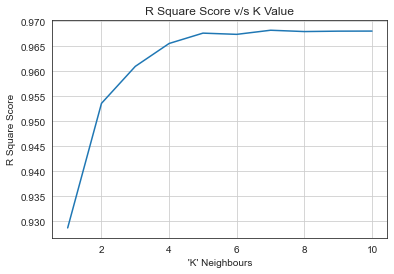

In [126]:
visualise(r_square_score_list, K)

********************************************************************************************************************
********************************************************************************************************************
********************************************************************************************************************

## From above graph we can observe that R_Square value has increased from 0.953 to 0.967 from k=2 to k=5 means more than 1% and later on we did not see any such improvement rather we can see the fluctuation is scores

## so for the selected strong predictions k = 5 will give good result for this problem

## Will use all the 4 distance metric Manhattan, Minkowski, Mahalnobis and Hamming on the selected strong features and see if it increase the score
## We know that score of mahanolobis and hamming are in negative, it could be discarded but for experimentation will see if this metrics fit data properly with newly selected features

********************************************************************************************************************
********************************************************************************************************************
********************************************************************************************************************

1) Manhattan

In [147]:
KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='manhattan')

KNNRegression.fit(new_training_data[:, 0:-1], new_training_data[:,-1])

KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=3)

In [148]:
KNNRegression.score(new_test_data[:,0:-1], new_test_data[:,-1])

0.9555620598789291

2) Minkowski

In [127]:
KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='minkowski', metric_params={'V':np.cov(new_training_data[:, 0:-1])})

KNNRegression.fit(new_training_data[:, 0:-1], new_training_data[:,-1])

KNeighborsRegressor(algorithm='brute',
                    metric_params={'V': array([[ 0.0053048 , -0.03783644, -0.05894303, ..., -0.05608456,
        -0.00221903,  0.00551058],
       [-0.03783644,  0.56439696,  0.44349119, ...,  0.24860501,
        -0.33877491,  0.0638371 ],
       [-0.05894303,  0.44349119,  0.79474251, ...,  0.39779431,
        -0.27049391,  0.09141051],
       ...,
       [-0.05608456,  0.24860501,  0.39779431, ...,  1.01016537,
         0.59786998, -0.38187748],
       [-0.00221903, -0.33877491, -0.27049391, ...,  0.59786998,
         0.99719971, -0.29464167],
       [ 0.00551058,  0.0638371 ,  0.09141051, ..., -0.38187748,
        -0.29464167,  0.43708408]])},
                    n_neighbors=3)

In [128]:
KNNRegression.score(new_test_data[:,0:-1], new_test_data[:,-1])

0.9597535566295161

3) Mahalanobis

In [137]:
KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='mahalanobis', metric_params={'VI':np.cov(new_training_data[:, 0:-1])})

KNNRegression.fit(new_training_data[:, 0:-1], new_training_data[:,-1])

KNeighborsRegressor(algorithm='brute', metric='mahalanobis',
                    metric_params={'VI': array([[ 0.0053048 , -0.03783644, -0.05894303, ..., -0.05608456,
        -0.00221903,  0.00551058],
       [-0.03783644,  0.56439696,  0.44349119, ...,  0.24860501,
        -0.33877491,  0.0638371 ],
       [-0.05894303,  0.44349119,  0.79474251, ...,  0.39779431,
        -0.27049391,  0.09141051],
       ...,
       [-0.05608456,  0.24860501,  0.39779431, ...,  1.01016537,
         0.59786998, -0.38187748],
       [-0.00221903, -0.33877491, -0.27049391, ...,  0.59786998,
         0.99719971, -0.29464167],
       [ 0.00551058,  0.0638371 ,  0.09141051, ..., -0.38187748,
        -0.29464167,  0.43708408]])},
                    n_neighbors=3)

In [138]:
KNNRegression.score(new_test_data[:,0:-1], new_test_data[:,-1])

-0.0112442246218869

4) Hamming

In [149]:
KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                    metric='hamming', metric_params={'V':np.cov(trainingData[:, 0:-1])})

KNNRegression.fit(new_training_data[:, 0:-1], new_training_data[:,-1])

KNeighborsRegressor(algorithm='brute', metric='hamming',
                    metric_params={'V': array([[ 1.10627836,  0.12535803, -0.02765481, ..., -0.41880522,
        -0.59713489,  0.20156931],
       [ 0.12535803,  1.00190315, -0.1984574 , ...,  0.30053543,
        -0.15101237,  0.22505434],
       [-0.02765481, -0.1984574 ,  0.95482353, ..., -0.22128758,
        -0.01273118,  0.23208212],
       ...,
       [-0.41880522,  0.30053543, -0.22128758, ...,  0.82752817,
         0.36539651, -0.37336213],
       [-0.59713489, -0.15101237, -0.01273118, ...,  0.36539651,
         0.81258381,  0.0698001 ],
       [ 0.20156931,  0.22505434,  0.23208212, ..., -0.37336213,
         0.0698001 ,  1.01664977]])},
                    n_neighbors=3)

In [150]:
KNNRegression.score(new_test_data[:,0:-1], new_test_data[:,-1])

-1.34814019784057

## we can see that the score has increased 
1) Manhattan -- from 0.7854 to 0.9555

2) Minkowski -- from 0.81 to 0.9597

3) Mahanalobis -- from -0.095 to -0.011

4) Hamming -- -1.3481 to -1.3481

#### From above result it we can see that there is no improvement for Hamming metrics, where as mahanalobis has showed improment but still the score is in negative, therefore for this particular data we can discard those metrics and consider only manhattan and minkowski

# Before moving forward let us try mahanalobis and hamming with different values of neighbours

In [156]:
def mahanalobis(i):
    KNNRegression = KNeighborsRegressor(n_neighbors=i, algorithm='brute',
                                        metric='mahalanobis', metric_params={'VI':np.cov(new_training_data[:, 0:-1])})

    KNNRegression.fit(new_training_data[:, 0:-1], new_training_data[:,-1])
    
    return KNNRegression.score(new_test_data[:,0:-1], new_test_data[:,-1])    

In [159]:
for i in range(3, 11):
    score = mahanalobis(i)
    print("for K = ", i, "Score = ", score)

for K =  3 Score =  -0.0112442246218869
for K =  4 Score =  0.08325012174057322
for K =  5 Score =  0.12442872877298927
for K =  6 Score =  0.13248364156834302
for K =  7 Score =  0.13844772975876196
for K =  8 Score =  0.15905124381055635
for K =  9 Score =  0.1666933510908789
for K =  10 Score =  0.17900116023430257


In [160]:
def hamming(i):
    KNNRegression = KNeighborsRegressor(n_neighbors=3, algorithm='brute',
                                        metric='hamming', metric_params={'V':np.cov(trainingData[:, 0:-1])})

    KNNRegression.fit(new_training_data[:, 0:-1], new_training_data[:,-1])
    
    return KNNRegression.score(new_test_data[:,0:-1], new_test_data[:,-1])    

In [161]:
for i in range(3, 11):
    score = hamming(i)
    print("for K = ", i, "Score = ", score)

for K =  3 Score =  -1.34814019784057
for K =  4 Score =  -1.34814019784057
for K =  5 Score =  -1.34814019784057
for K =  6 Score =  -1.34814019784057
for K =  7 Score =  -1.34814019784057
for K =  8 Score =  -1.34814019784057
for K =  9 Score =  -1.34814019784057
for K =  10 Score =  -1.34814019784057


We can observe that even after with different values of neighbours Hamming performance has not increased, there reson for this is "The hamming distance is mostly used in text processing or having the boolean vector. Boolean vector means the data is in the form of binary digits 0 and 1. So, the hamming distance calculates the distance between two binary vectors, also referred to as binary strings." where as the Mahalanobis has increased but not as good as for other distance metrics, therefore for this particular dataset will discard them.

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------

# Will try for normalisation on the new data after feature selection

In [69]:
'''reading the two file 1) training data 2) test data'''
trainingData = np.genfromtxt('regression/trainingData.csv', delimiter=',')
testData = np.genfromtxt('regression/testData.csv', delimiter=',')


In [70]:
# Feature Selection
feature_selected = [6,7,8,9,11,12]
new_training_data = trainingData[:, feature_selected]
new_test_data = testData[:, feature_selected]

In [71]:
# Normalisation
min_new_training_data = new_training_data[:,0:-1].min(axis = 0)
max_new_training_data = new_training_data[:,0:-1].max(axis = 0)

new_training_data[:,0:-1] = (new_training_data[:,0:-1] - new_training_data[:,0:-1].min(axis = 0) ) / ( new_training_data[:,0:-1].max(axis = 0) - new_training_data[:,0:-1].min(axis = 0) )

new_test_data[:,0:-1] = (new_test_data[:, 0:-1]-min_new_training_data)/(max_new_training_data-min_new_training_data)

In [72]:
def execution_main_4():
    K = []
    len_test_data = len(new_test_data)
    r_square_score_list = []
    
    for k in range(1, 11):    
        prediction = []
        '''this loop will run for length of test data instances'''
        for p in range(len_test_data):
            prediction_value = predict(new_training_data[:, 0:-1], new_test_data[p, 0:-1], new_training_data, k )
            prediction.append(prediction_value)
    
        '''this function will use actual target value with predicted value'''
        
        r2_score = calculate_r2(new_test_data[:, -1], np.array(prediction) )
        r_square_score_list.append(r2_score)
        K.append(k)
        print("for k=", k, "R_Square_Score is = ",r2_score)


In [73]:
execution_main_4()

for k= 1 R_Square_Score is =  0.9272798660104137
for k= 2 R_Square_Score is =  0.9533154657863601
for k= 3 R_Square_Score is =  0.960192965320031
for k= 4 R_Square_Score is =  0.9646813124611873
for k= 5 R_Square_Score is =  0.9659711654231271
for k= 6 R_Square_Score is =  0.9669160457049849
for k= 7 R_Square_Score is =  0.9664254147139666
for k= 8 R_Square_Score is =  0.9663683271554986
for k= 9 R_Square_Score is =  0.9663435186117324
for k= 10 R_Square_Score is =  0.9657726886144943


### From above approaches we can conclude that Euclidean distance with inverse squared distance weights performs better with if it has the strong features

# References are placed Below

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://www.analyticsvidhya.com/blog/2021/08/how-knn-uses-distance-measures/

https://stackoverflow.com/questions/37924606/scikit-learn-how-do-we-define-a-distance-metrics-parameter-for-grid-search

https://www.codegrepper.com/code-examples/python/knn+regression+scikit+learn

https://www.machinelearningplus.com/statistics/mahalanobis-distance/
